In [3]:
library(caret)
library(glmnet)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-4



## P1 

In [2]:
# read ablone data
aburl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abnames = c('sex','length','diameter','height','weight.w','weight.s','weight.v','weight.sh','rings')
abalone = read.table(aburl, header = F , sep = ',', col.names = abnames)

In [3]:
# Remove all observations in the Infant category
abalone <-  abalone[abalone$sex != 'I',]
abalone$sex <- factor(abalone$sex)

In [4]:
# train test split
trainIdx <- createDataPartition(
  1:dim(abalone)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
abaloneTrain <- abalone[trainIdx,]
abaloneTest <- abalone[-trainIdx,]

In [9]:
# fit glm model
fit <- glm(sex~., data=abaloneTrain, family=binomial(link = "logit"))
summary(fit)


Call:
glm(formula = sex ~ ., family = binomial(link = "logit"), data = abaloneTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7864  -1.1976   0.8887   1.1257   1.4265  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.720708   0.509778   5.337 9.45e-08 ***
length      -2.338788   2.258816  -1.035  0.30048    
diameter    -4.090233   2.694733  -1.518  0.12905    
height      -3.009431   2.053818  -1.465  0.14284    
weight.w     0.221657   0.825728   0.268  0.78836    
weight.s     2.718506   0.988080   2.751  0.00594 ** 
weight.v    -1.621990   1.447007  -1.121  0.26232    
weight.sh    0.209366   1.262684   0.166  0.86831    
rings       -0.006724   0.017779  -0.378  0.70528    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3137.7  on 2270  degrees of freedom
Residual deviance: 3087.4  on 2262  degrees of freedom
AIC: 3105

It can be observed that eight.s is significant at 5% level.

In [10]:
confint(fit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),1.73507330,3.73483051
length,-6.77106478,2.08964938
diameter,-9.38723140,1.18471867
height,-7.57426554,0.42408753
weight.w,-1.40030367,1.84868615
weight.s,0.78611689,4.66758156
weight.v,-4.46673049,1.21235667
weight.sh,-2.27399441,2.68809205
rings,-0.04160944,0.02813387


Except weight.w, all the predictors contain 0 within the 95% range. It suggests that we can't reject the null hypothesis at 5% level.

In [11]:
# predict for test data
test.pred <- predict(fit, abaloneTest[,2:length(abaloneTest)], type="response")
test.pred[test.pred>0.5] = 'M'
test.pred[test.pred != 'M'] = 'F'
# confusion matrix
confusionMatrix(factor(test.pred), abaloneTest$sex)

Confusion Matrix and Statistics

          Reference
Prediction   F   M
         F 106  83
         M 143 232
                                        
               Accuracy : 0.5993        
                 95% CI : (0.5575, 0.64)
    No Information Rate : 0.5585        
    P-Value [Acc > NIR] : 0.02787       
                                        
                  Kappa : 0.1664        
                                        
 Mcnemar's Test P-Value : 8.687e-05     
                                        
            Sensitivity : 0.4257        
            Specificity : 0.7365        
         Pos Pred Value : 0.5608        
         Neg Pred Value : 0.6187        
             Prevalence : 0.4415        
         Detection Rate : 0.1879        
   Detection Prevalence : 0.3351        
      Balanced Accuracy : 0.5811        
                                        
       'Positive' Class : F             
                                        

The accuracy is given by 0.5993, only slightly higher than 0.5 given by a random classifier ROC curve.

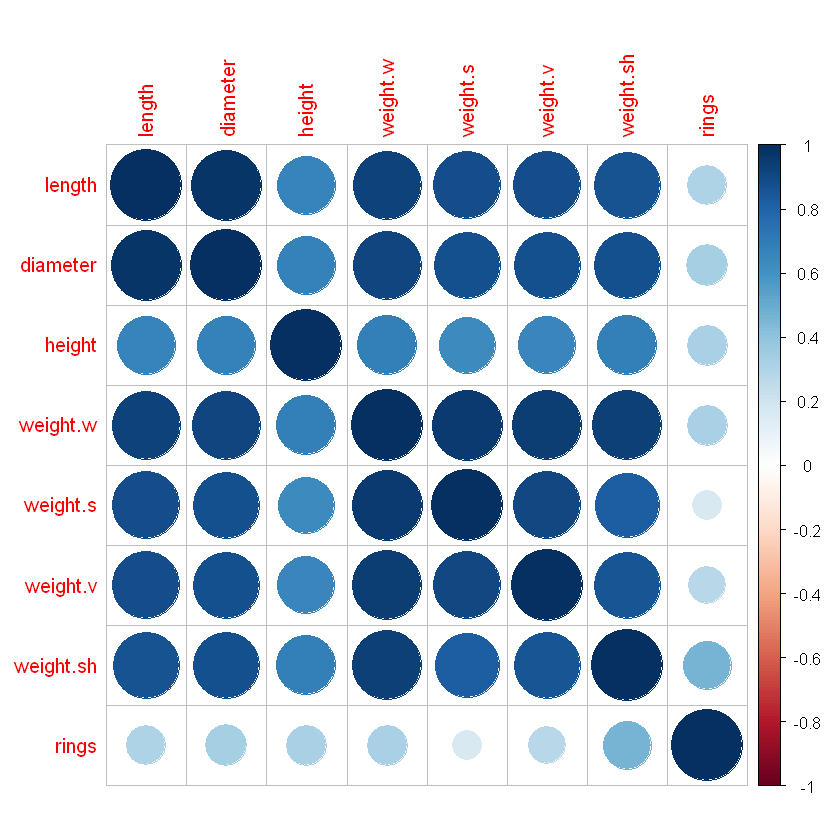

In [14]:
# correlation matrix between predictors
aba.corr <- cor(abaloneTrain[,2:length(abaloneTrain)])
corrplot(aba.corr)

There are a lot of pairs of predictors strongly correlated with each other (corr>0.8). The multicollinearity problem makes each predictor less related to the response variables, and thus render the low accuracy on the test data.

## P2 

In [17]:
# read mushroom data
mrurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mrnames = c("poiede","cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment",
            "gill_spacing","gill_size","gill_color","stalk_shape","stalk_root","stalk_surface_above_ring",
            "stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type",
            "veil_color","ring_number","ring_type","spore_print_color","population","habitat")
mushroom = read.table(mrurl, header = F , sep = ',', col.names = mrnames)

In [21]:
# train test split
trainIdx <- sample(1:dim(mushroom)[1], size=as.integer(dim(mushroom)[1]*0.8), replace = FALSE)
mushroomTrain <- mushroom[trainIdx,]
mushroomTest <- mushroom[-trainIdx,]

In [30]:
# create a Naive Bayes classifier
nb.fit <- naiveBayes(poiede ~ ., data = mushroomTrain)

##### Calculate accuracy for both in-training and in-test

In [32]:
# accuracy for in-training
train.pred <- predict(nb.fit, mushroomTrain[,2:length(mushroomTrain)])
sum(train.pred == mushroomTrain$poiede)/dim(mushroomTrain)[1]

[1] 0.9427604

In [33]:
# accuracy for in-test
test.pred <- predict(nb.fit, mushroomTest[,2:length(mushroomTest)])
sum(test.pred == mushroomTest$poiede)/dim(mushroomTest)[1]

[1] 0.9341538

In [36]:
# confusion matrix for in-test
table(test.pred, mushroomTest$poiede)

         
test.pred   e   p
        e 859 100
        p   7 659

We assume edible to be the positive class. The model produces 100 false positives in the testing data.

## P3 

In [115]:
# load Yacht Hydrodynamics sample dataset
yhurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data'
yhnames = c('Longitudinal Position', 'Prismatic Coeefficient','Length-Displacement', 'Beam-Draught Ratio',
             'Length-Beam Ratio', 'Froude Number','Residuary Resistance')
yacht = read.table(yhurl, header = F , sep = '', col.names = yhnames)

In [116]:
# train test split
trainIdx <- createDataPartition(
  1:dim(yacht)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
yachtTrain <- yacht[trainIdx,]
yachtTest <- yacht[-trainIdx,]

##### Fit with single sample

In [117]:
# fit linear model
lm.fit <- lm(Residuary.Resistance~., data=yachtTrain)
# define function to compute RMSE and R2
cal.rmse <- function(pred, actual){
    # function to compute RMSE
    return(sqrt(mean((pred - actual)^2)))
}

cal.r2 <- function(pred, actual){
    # function to compute r2
    rss <- sum((pred - actual) ^ 2)
    tss <- sum((actual - mean(actual)) ^ 2)
    rsq <- 1 - rss/tss
    return (rsq)
}

# training accuracy
train.pred <- predict(lm.fit, data=yachtTrain[,1:(length(yachtTrain)-1)])
train.RMSE <- cal.rmse(train.pred, yachtTrain$Residuary.Resistance)
train.R2 <- cal.r2(train.pred, yachtTrain$Residuary.Resistance)
print(paste('Train RMSE:', as.character(train.RMSE)))
print(paste('Train R2:', as.character(train.R2)))

[1] "Train RMSE: 8.79472613923226"
[1] "Train R2: 0.653271194807307"


##### Bootstrap Fitting

In [118]:
# bootstrap training
# Define training control
train.control <- trainControl(method = "boot", number = 1000)
# Train the model
boot.fit <- train(Residuary.Resistance~., data = yachtTrain, method = "lm",
               trControl = train.control)

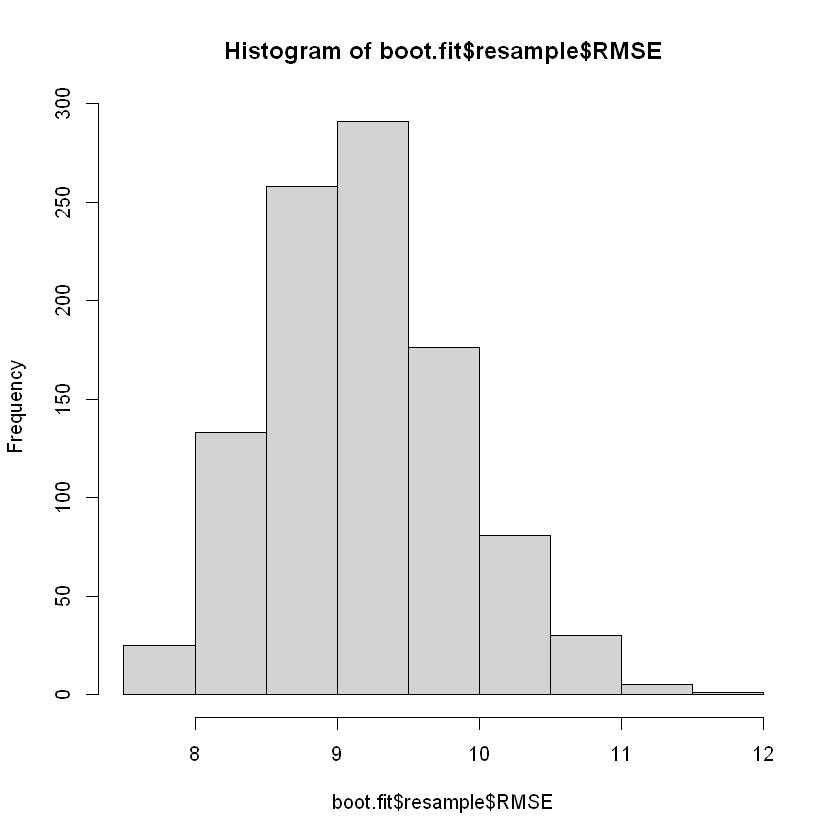

In [119]:
# histogram of RMSE
hist(boot.fit$resample$RMSE)

In [120]:
# mean of RMSE and R2
RMSE.boot <- mean(boot.fit$resample$RMSE)
R2.boot <- mean(boot.fit$resample$Rsquared)
print(paste('Bootstrap Train RMSE:', as.character(RMSE.boot)))
print(paste('Bootstrap Train R2:', as.character(R2.boot)))

[1] "Bootstrap Train RMSE: 9.17666409282626"
[1] "Bootstrap Train R2: 0.631603720028309"


The bootstrap RMSE is slightly higher than that in the original model, and the bootstrap R2 is slightly lower.

##### Comparison on test set

In [122]:
# test RMSE and R2 on Original Model
test.pred <- predict.lm(lm.fit, newdata=yachtTest[,1:(length(yachtTest)-1)])
test.RMSE <- cal.rmse(test.pred, yachtTest$Residuary.Resistance)
test.R2 <- cal.r2(test.pred, yachtTest$Residuary.Resistance)
print(paste('Original Test RMSE:', as.character(test.RMSE)))
print(paste('Original Test R2:', as.character(test.R2)))

[1] "Original Test RMSE: 9.20961547380112"
[1] "Original Test R2: 0.66497520566234"


In [125]:
# test RMSE and R2 on bootstrap Model
test.pred <- predict(boot.fit, newdata=yachtTest[,1:(length(yachtTest)-1)])
test.RMSE <- cal.rmse(test.pred, yachtTest$Residuary.Resistance)
test.R2 <- cal.r2(test.pred, yachtTest$Residuary.Resistance)
print(paste('Original Test RMSE:', as.character(test.RMSE)))
print(paste('Original Test R2:', as.character(test.R2)))

[1] "Original Test RMSE: 9.20961547380112"
[1] "Original Test R2: 0.66497520566234"


The testing RMSE and R2 is the same on the testing data.

## P4

In [4]:
# load German Credit Data sample dataset
gcurl <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
german <- read.table(gcurl, header = F)
german$V25[german$V25==2] = 'Y'
german$V25[german$V25==1] = 'N'
german$V25 <- factor(german$V25, levels=c('Y','N'))

In [5]:
# train test split
trainIdx <- createDataPartition(
  1:dim(german)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
germanTrain <- german[trainIdx,]
germanTest <- german[-trainIdx,]

In [6]:
# fit glm model
fit <- glm(V25~., data=germanTrain, family=binomial(link = "logit"))
# function to compute accuracy
cal.acc <- function(actual, pred){
    # create confusion matrix
    cfmat <- table(actual, pred)
    TP <- cfmat[1,1]
    FP <- cfmat[2,1]
    FN <- cfmat[1,2]
    # precision
    precision <- TP / (TP+FP)
    # recall
    recall <- TP / (TP+FN)
    # F1
    F1 <- (2 * precision * recall) / (precision+recall)
    return(list(precision=precision,
               recall=recall,
               F1=F1))
}
# compute training accuracy
train.pred <- predict(fit, newdata=germanTrain[,1:(length(germanTrain)-1)], type='response')
train.pred[train.pred>0.5] = 'N'
train.pred[train.pred != 'N'] = 'Y'
train.pred <- factor(train.pred, levels=c('Y','N'))
print('Training precision, recall, and F1:')
cal.acc(germanTrain$V25, train.pred)

[1] "Training precision, recall, and F1:"


$precision
[1] 0.6914894

$recall
[1] 0.5462185

$F1
[1] 0.6103286

##### Cross validation accuracy

In [7]:
# function to compute accuracy
customSummary <- function(data, lev = NULL, model = NULL){
  precision <- posPredValue(data$pred, data$obs, positive = "Y")
  recall  <- sensitivity(data$pred, data$obs, postive = "Y")
  F1 <- (2 * precision * recall) / (precision + recall)
  acc.vec <- c(precision, recall, F1)
  names(acc.vec) <- c('precision', 'recall', 'F1')
  return(acc.vec)
} 
ctrl <- trainControl(method = "cv", number=10, classProbs = TRUE,
                     summaryFunction = customSummary)

cv.fit <- train(V25~., data=germanTrain,
                  method = "glm", trControl = ctrl)

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. precision will be used instead.”


In [8]:
# cross-validation accuracy
cv.fit$results[,2:4]

,precision,recall,F1
,<dbl>,<dbl>,<dbl>
1,0.6483247,0.5255435,0.575894


The cross-validated training accuracy is lower than that for the original model.

##### Test Accuracy

In [9]:
# testing accuracy for original model
test.pred <- predict(fit, newdata=germanTest[,1:(length(germanTest)-1)], type='response')
test.pred[test.pred>0.5] = 'N'
test.pred[test.pred != 'N'] = 'Y'
test.pred <- factor(test.pred, levels=c('Y','N'))
print('Test precision, recall, and F1:')
cal.acc(germanTest$V25, test.pred)

[1] "Test precision, recall, and F1:"


$precision
[1] 0.6122449

$recall
[1] 0.483871

$F1
[1] 0.5405405

In [10]:
# testing accuracy for cross-validated model
test.pred <- predict(cv.fit, newdata=germanTest[,1:(length(germanTest)-1)])
print('Test precision, recall, and F1:')
cal.acc(germanTest$V25, test.pred)

[1] "Test precision, recall, and F1:"


$precision
[1] 0.6122449

$recall
[1] 0.483871

$F1
[1] 0.5405405

The test accuracy is the same for both models.